# Step 1: Dataset Selection (Sample Stage)

In [10]:
import pandas as pd

data = pd.read_csv('./data/stroke_data.csv')

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Step 2: Exploratory Data Analysis (Explore Stage)

## Target Variable Analysis

(i) Distribution of Stroke and Stroke

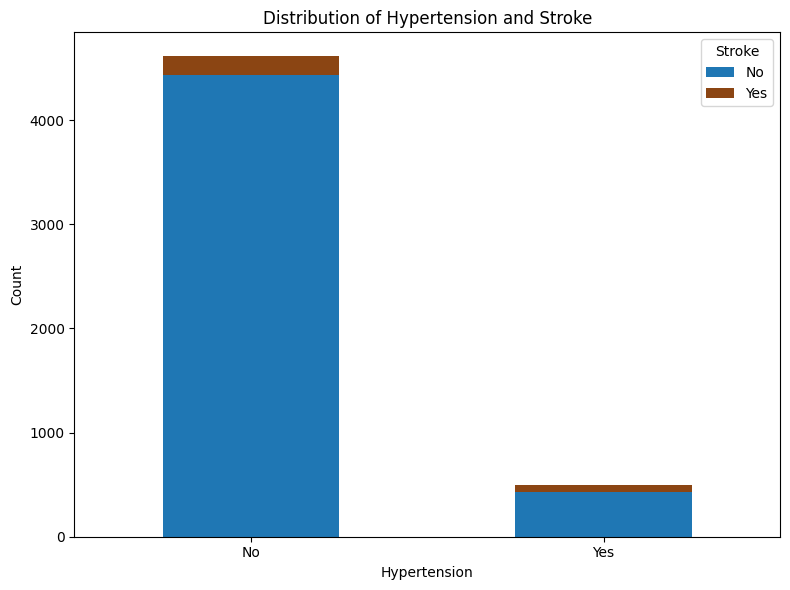

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a grouped bar chart for hypertension and stroke
hypertension_stroke_counts = data.groupby(['hypertension', 'stroke']).size().unstack()

ax = hypertension_stroke_counts.plot(
    kind='bar',
    stacked=True,
    color=['#1f77b4', "#8B4513"],  # Adjust colors to match the style
    figsize=(8, 6)
)

plt.title('Distribution of Hypertension and Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)  # Specify ticks and labels
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.tight_layout()


(ii) Smoking Status vs Stroke

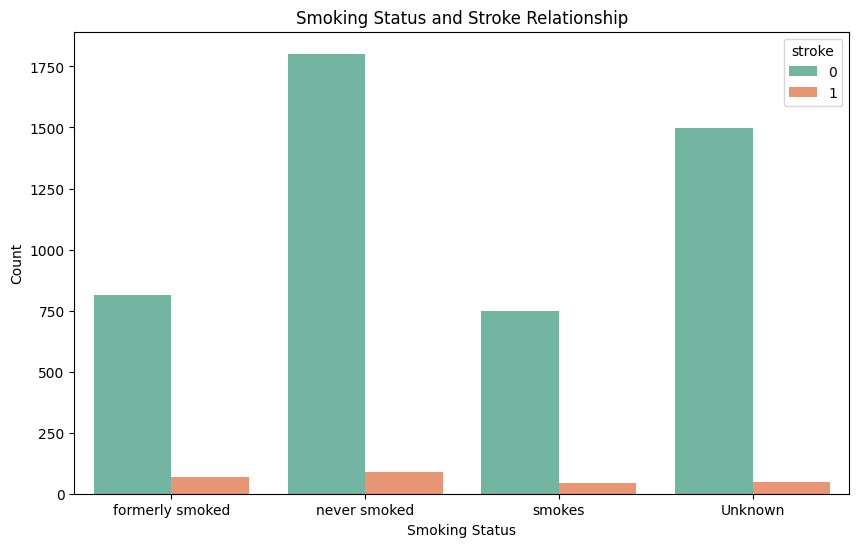

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## add some automated charts here...
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='smoking_status', hue='stroke', palette='Set2')
plt.title('Smoking Status and Stroke Relationship')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

(iii) BMI vs Stroke

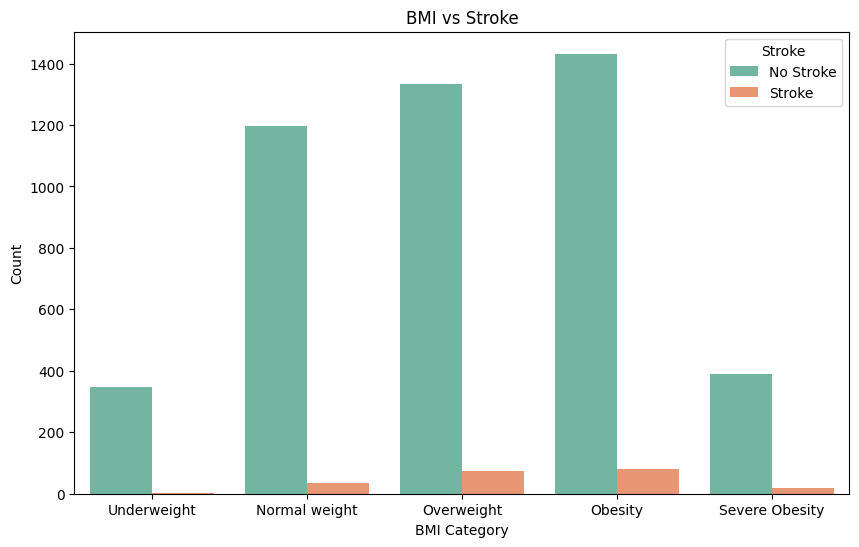

In [14]:
chart_data = data.copy(deep=True)

bmi_bins = [0, 18.5, 24.9, 29.9, 40, 100]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity', 'Severe Obesity']

chart_data['bmi_category'] = pd.cut(chart_data['bmi'], bins=bmi_bins, labels=bmi_labels)
plt.figure(figsize=(10, 6))
sns.countplot(data=chart_data, x='bmi_category', hue='stroke', palette='Set2')
plt.title('BMI vs Stroke')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

## Univariate Analysis

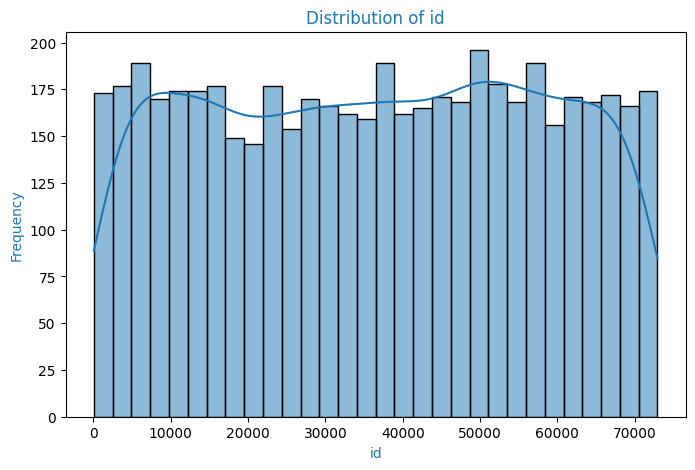

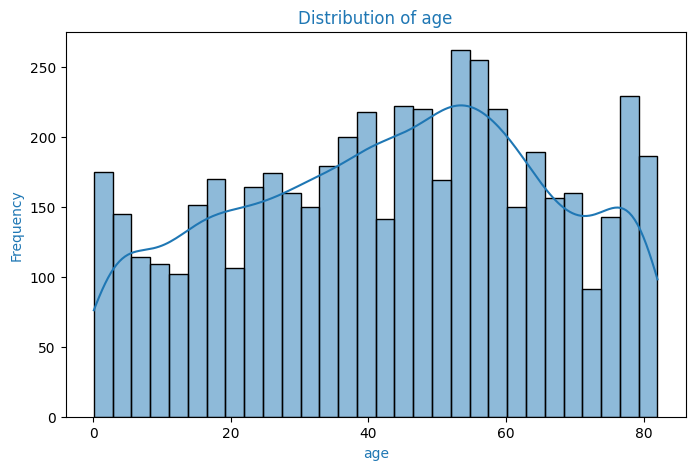

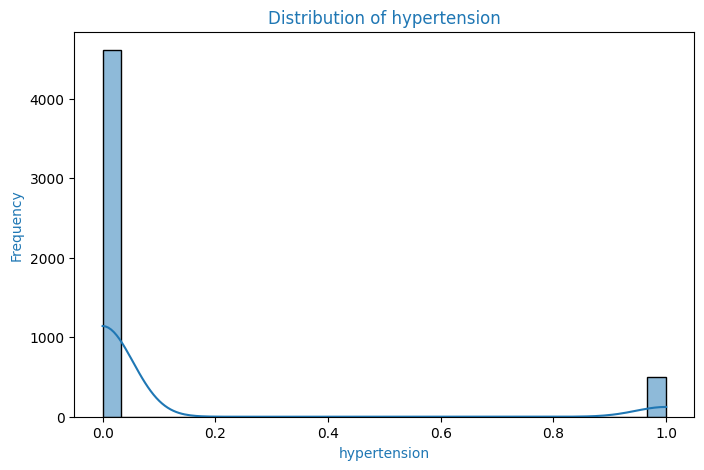

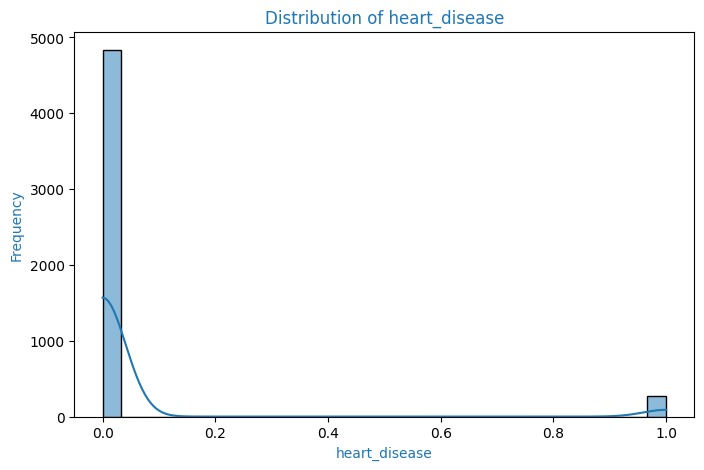

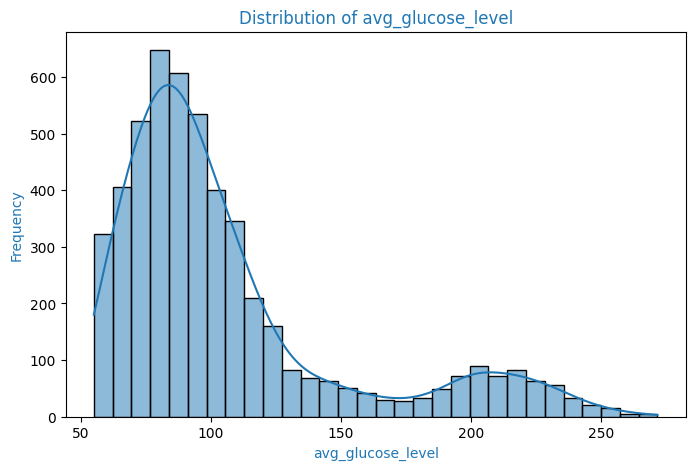

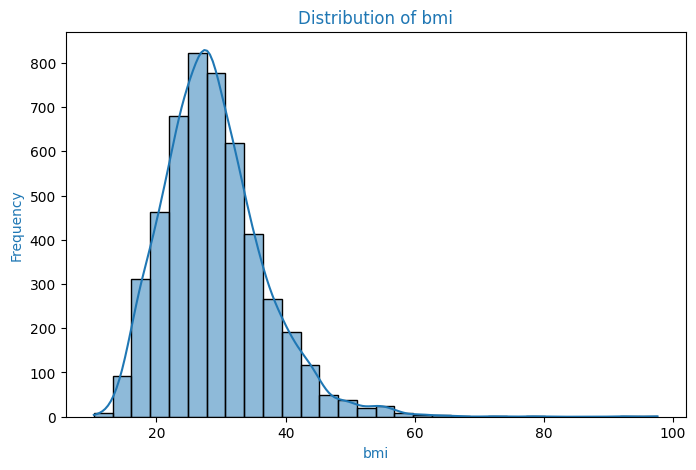

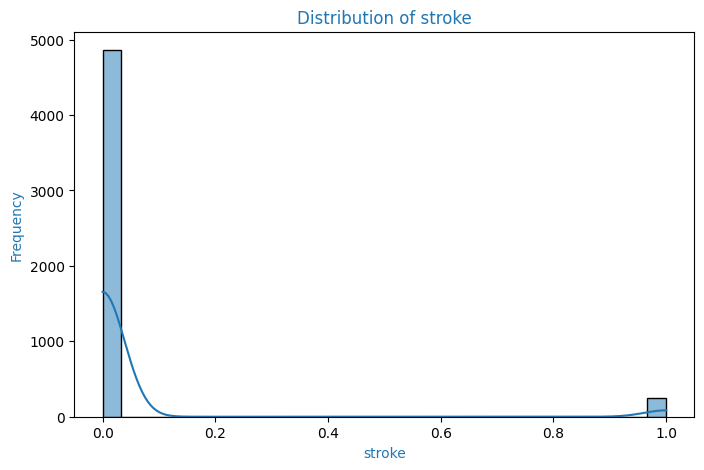

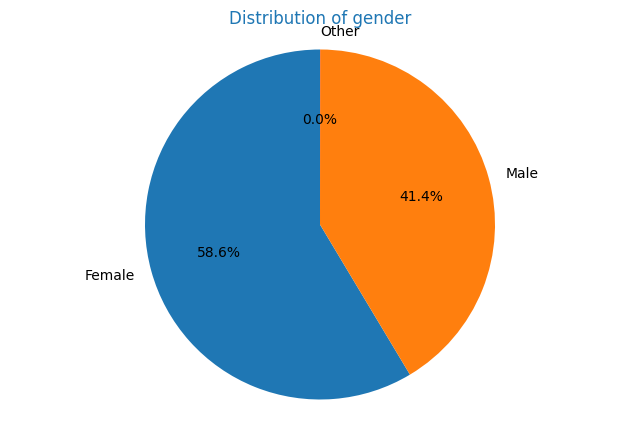

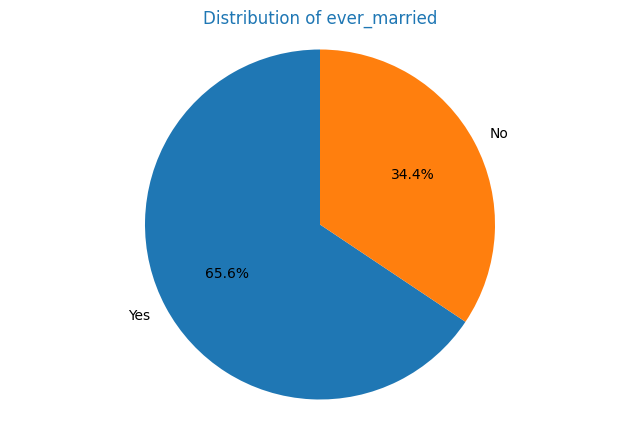

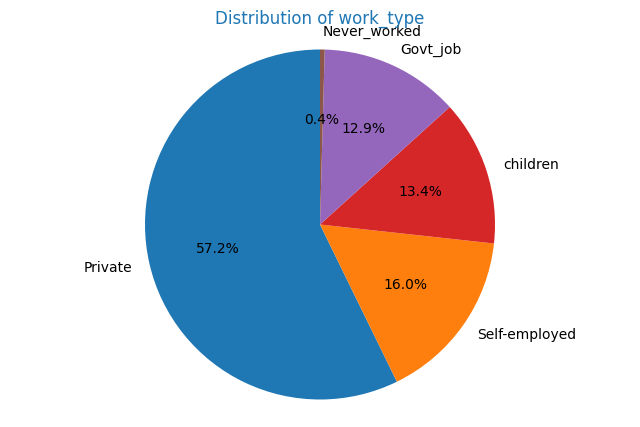

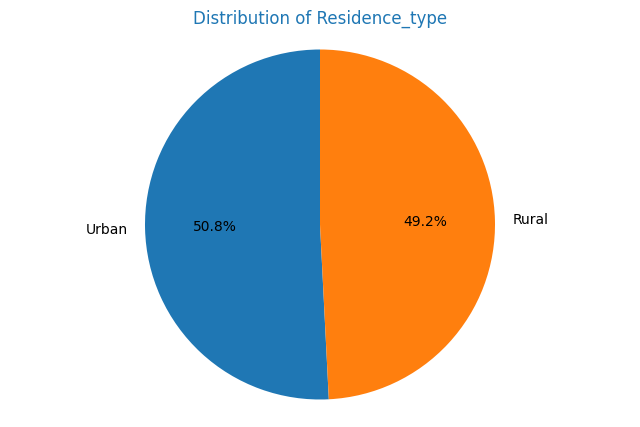

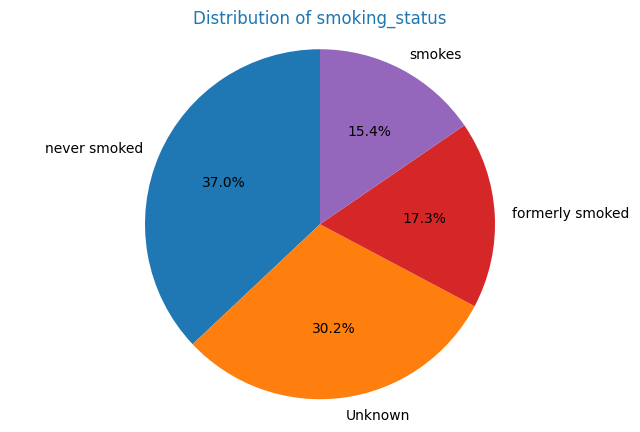

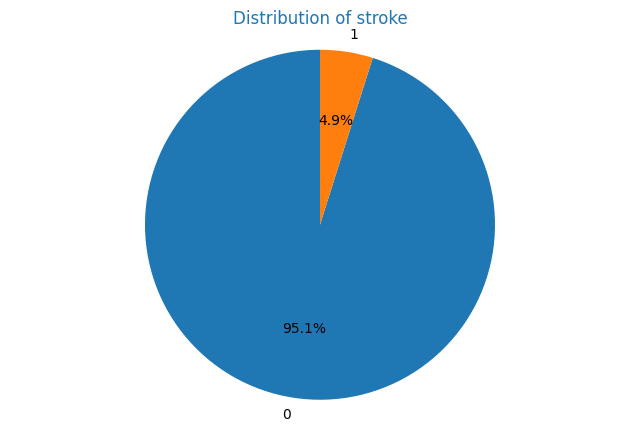

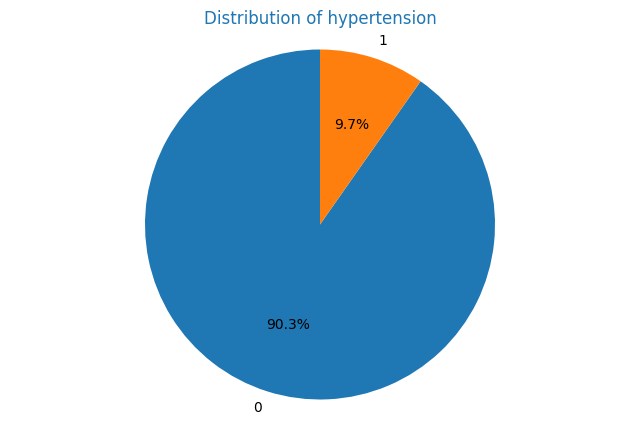

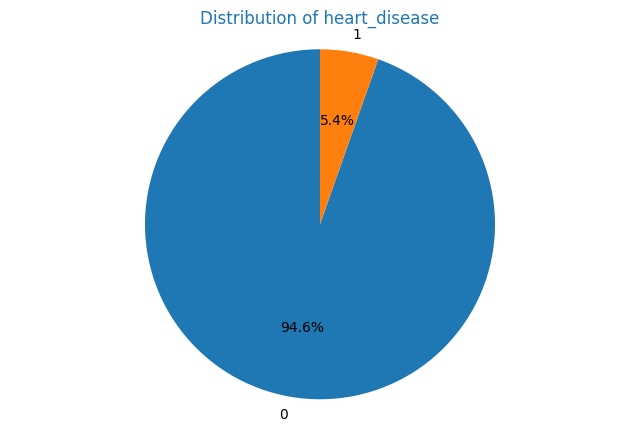

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

blue_color = '#1f77b4'
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:   
        plt.figure(figsize=(8, 5))
        sns.histplot(data[column], kde=True, color=blue_color, bins=30)
        plt.title(f"Distribution of {column}", color=blue_color)
        plt.xlabel(column, color=blue_color)
        plt.ylabel('Frequency', color=blue_color)
        plt.show()
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke', "hypertension", "heart_disease"]

for col in categorical_cols:
    if col in data.columns:
        plt.figure(figsize=(8, 5))
     
        count_data = data[col].value_counts()
        plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', colors=[blue_color, '#ff7f0e', '#d62728', '#9467bd', '#8c564b'], startangle=90)
        plt.title(f"Distribution of {col}", color=blue_color)
        plt.axis('equal') 
        plt.show()

## Correlation Plot

Text(0.5, 1.0, 'Heatmap of Selected Variables with Stroke Highlighted')

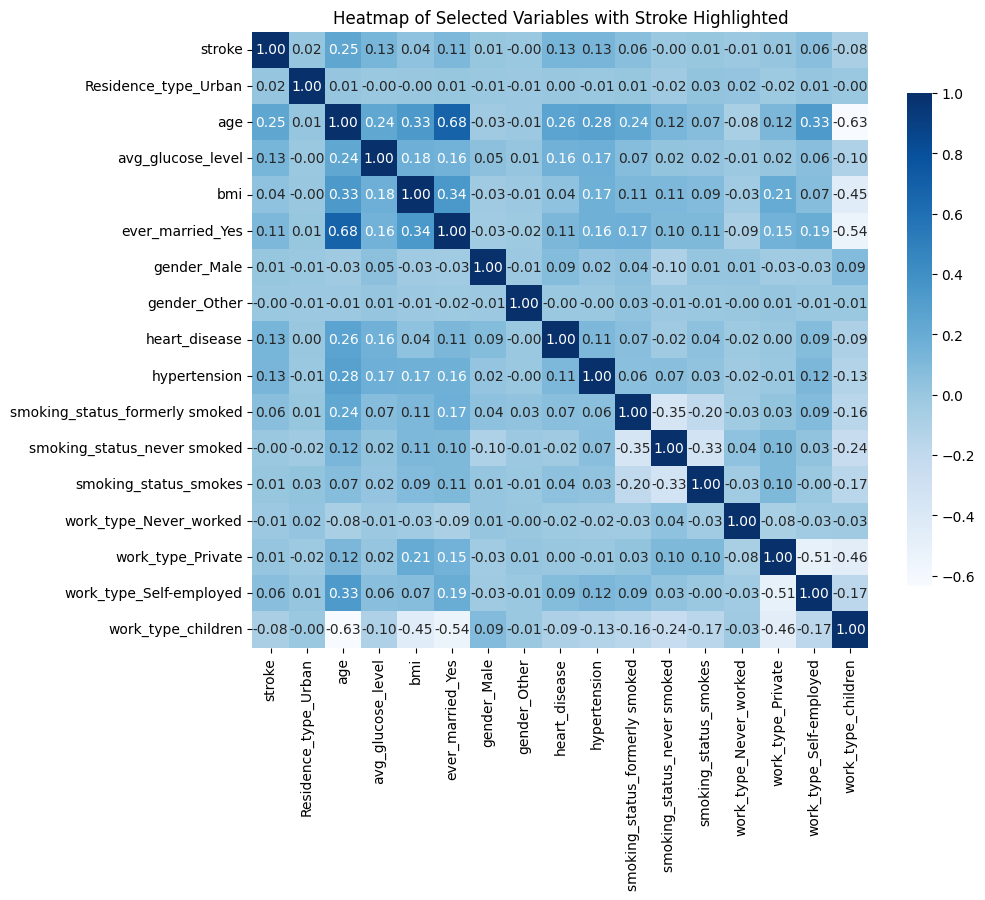

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Select relevant columns for the heatmap
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
           'smoking_status', 'stroke']

# Encode categorical variables into numeric for correlation calculation
encoded_data = pd.get_dummies(data[columns], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = encoded_data.corr()

# Reorder the columns to place 'stroke' at the end
correlation_matrix = correlation_matrix.reindex(index=correlation_matrix.index, columns=['stroke'] + list(correlation_matrix.columns.difference(['stroke'])))
correlation_matrix = correlation_matrix.reindex(columns=correlation_matrix.columns, index=['stroke'] + list(correlation_matrix.index.difference(['stroke'])))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', square=True, cbar_kws={"shrink": 0.8})
plt.title("Heatmap of Selected Variables with Stroke Highlighted")

## Computing Environment

In [16]:
%load_ext watermark

%watermark --iversions

# date
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas         : 1.5.3
seaborn        : 0.13.2
ydata_profiling: 4.12.1
matplotlib     : 3.9.4

Last updated: Fri Jan 17 2025 08:04:12Malay Peninsula Standard Time

